<a href="https://colab.research.google.com/github/Carhuacusma/CC61_PDI_TA4_u201818067/blob/main/PDI_TA4_u201818067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento Digital de Imágenes - Detección y segmentación

## Objetivos:

##Ejercicio: Detección y Segmentación

### Detección de descontinuidades

En imágenes, las descontinuidades buscadas son puntos, segmentos de rectas, bordes y uniones

"La representación de los bordes en una imagen reduce significativamente la cantidad de data a ser procesada, reteniendo información esencial sobre las formas de los objetos en escena"

## Código

###Importando librerías

In [6]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage import io, filters, img_as_ubyte
from google.colab.patches import cv2_imshow

###Operadores de Detección de bordes

#### Operador de Roberts

In [ ]:
def roberts(baw, arr=[True for _ in range(2)]): # baw: Imagen en escala de grises; x,y: booleans de en qué eje aplicar
  x = arr[0]
  y = arr[1]
  m_x = np.array([[ 1, 0],
                  [ 0,-1]])
  m_y = np.array([[-1, 0],
                  [ 0, -1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Sobel / Prewitt

In [ ]:
def sobel_prewitt(baw, c=2, arr=[True for _ in range(2)]):
  x = arr[0]
  y = arr[1]
  m_x = np.array([[-1, 0, 1],
                  [-c, 0, c],
                  [-1, 0, 1]])
  m_y = np.array([[ 1, c, 1],
                  [ 0, 0, 0],
                  [-1,-c,-1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Kirsch

In [ ]:
def kirsch(baw,arr=[True for _ in range(8)]):
  mascaras = [np.array([[ 5, 5, 5],
                        [-3, 0,-3],
                        [-3,-3,-3]]),
              np.array([[-3, 5, 5],
                        [-3, 0, 5],
                        [-3,-3,-3]]),
              np.array([[-3,-3, 5],
                        [-3, 0, 5],
                        [-3,-3, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0, 5],
                        [-3, 5, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0,-3],
                        [ 5, 5, 5]]),
              np.array([[-3,-3,-3],
                        [ 5, 0,-3],
                        [ 5, 5,-3]]),
              np.array([[ 5,-3,-3],
                        [ 5, 0,-3],
                        [ 5,-3,-3]]),
              np.array([[ 5, 5,-3],
                        [ 5, 0,-3],
                        [-3,-3,-3]])]
  print(arr)    
  final = np.zeros(baw.shape,dtype=np.uint8)
  for i in range(8):
    if arr[i]:
      filtrada = cv2.filter2D(baw,-1,mascaras[i])
      final = final + filtrada
  return final

#### Función para edgeDetection

In [ ]:
def edgeDetection(imagen, operador, arr = [True for _ in range(8)], c=2, usaC = False):
  # Si la imagen no está en escala de grises, convertirla a escala de grises
  if len(imagen.shape) > 2:
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
  filtrada = [] # >> Imagen Filtrada
  if usac:
    filtrada = operador(imagen,c,arr)
  else:
    filtrada = operador(imagen,arr)
  if type(filtrada[0][0]) != np.uint8: #...Si el 'operador' es función de skimage devuelve float
    filtrada = img_as_ubyte(filtro) #..... Homogeneizar para trabajar en np.uint8 ...........
  return filtrada

### Transformada de Hough para Círculos

In [60]:
def HoughCirculo(filtrada, distMin, maxCanny, lessError, minRadio, maxRadio, orig = [[0 for _ in range(2)]]):
  circles = cv2.HoughCircles(filtrada, cv2.HOUGH_GRADIENT, 1, distMin, 
                             param1=maxCanny, param2=lessError, minRadius=minRadio, maxRadius=maxRadio)
  aux = [] # Imagen auxiliar para imagen con circulos encima
  if len(orig) > 2:
    aux = orig.copy()
  else:
    aux = filtrada.copy()
    aux = cv2.cvtColor(aux,cv2.COLOR_GRAY2BGR)
  j = 1
  if circles is not None:
    circles = np.uint16(np.around(circles[0]))
    for i in circles:
      center = (i[0],i[1])
      radius = i[2]
      #cv2.circle(aux, center, 1, (0, 100, 100), 2) #Dibujar centro
      ## 
      aux = cv2.putText(aux, str(j), center, cv2.FONT_HERSHEY_SIMPLEX, 1, 
                        (255,0,0), 2, cv2.LINE_AA) 
      ## 
      j += 1
      cv2.circle(aux, center, radius, (255, 0, 255), 2) #Dibuja los circulos
  return circles, aux

###Análisis de Circles para identificar las monedas

In [ ]:
def separarMonedas(circulos): # circulos : [[pos_1,pos_2,radio], [pos_1,pos_2,radio], ...]
  radios = circulos[:,2] # Solamente el 3er atributo (radio) de todos los circulos
  
  return 0

###Cargando la imagen

In [7]:
imagen = io.imread("https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/fondoHoja.jpg")
print(type(imagen))

<class 'numpy.ndarray'>


In [9]:
baw = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)

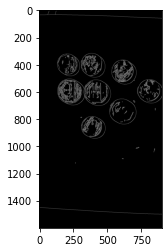

In [28]:
#@title Canny { run: "auto" }
minC = 25#@param{type:"slider", min:0, max:254, step:1}
maxC = 175#@param{type:"slider", min:0, max:255, step:1}
im_canny = cv2.Canny(baw,minC,maxC)
plt.imshow(im_canny,cmap='gray')

In [63]:
circulos, imCirc = HoughCirculo(im_canny,im_canny.shape[0]/32,maxC,55,50,120,imagen)

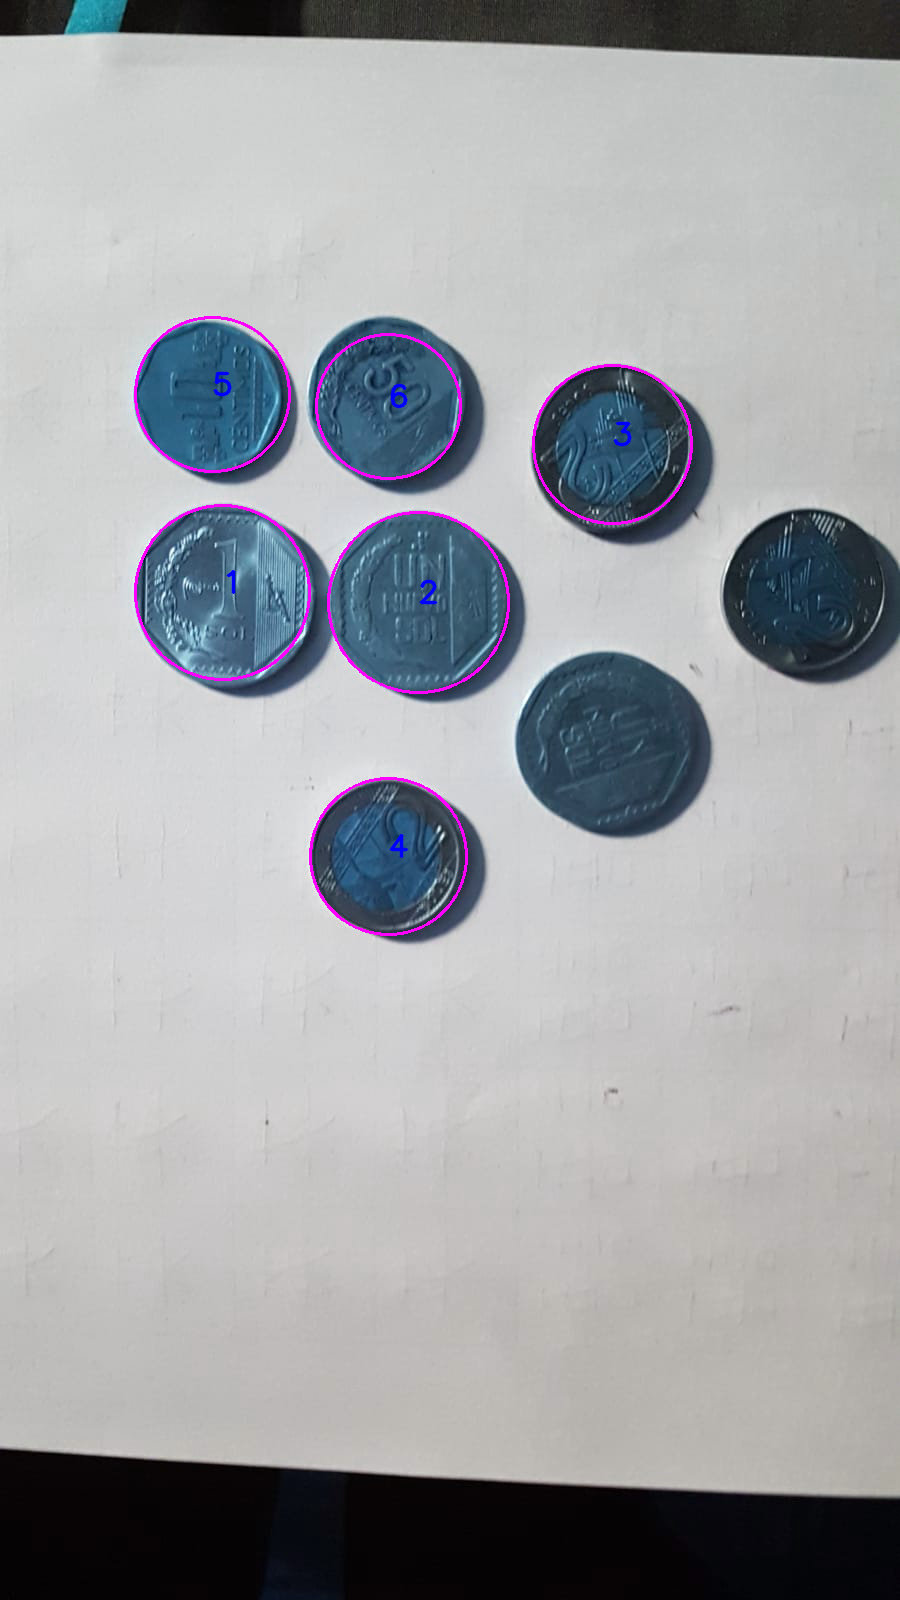

In [64]:
cv2_imshow(imCirc)

In [65]:
circulos

array([[222, 592,  87],
       [418, 602,  90],
       [612, 444,  79],
       [388, 856,  78],
       [212, 394,  77],
       [388, 406,  72]], dtype=uint16)

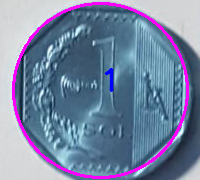

In [69]:
cv2_imshow(imCirc[502:682,122:322,:])

## Conclusiones

## Bibliografía

* Sharifi, M., Fathy, M. & Tayefeh Mahmoudi, M. (2002) *A Classified and Comparative Study of Edge Detection Algorithms*. Recuperado de: https://d1wqtxts1xzle7.cloudfront.net/34225837/01000371.pdf?1405616223=&response-content-disposition=inline%3B+filename%3DA_Classified_and_Comparative_Study_of_Ed.pdf&Expires=1603141615&Signature=G5vV07WSN8ZB-lvqXGo1zZBjAzwqH4qSWBkv5CBbpmPeU47BV1rQfoMrmzLFDI8gqyLAycqoZt7bgLSA0aTgkA6C0RZDpKbXvLuwKrlVFgOBYoGp~5YEhTbKvsE7HClxTuGlG82a6hIi5RijGuzdXWMrfxfAWs3~jP5Zu92I2FVDRh-qbNWDwill--JVmLP2Gg5sKA1BEmbjJAZ7oYsbX9I8tiruHgJydaDVyOreZZ7QhnBV6yJFph7~kUZRLihJELKZtXyP84gSFrklQbkeK1V18fqDft--~dLU7sUcVURErnhXOL7M2iqcsx1dyzANUxqR6R9vC4WT12Vz3VyPdw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA 
* Martinez, J. (2020) *Understanding and implementing shape detection using Hough Transform with OpenCV and Python*. Recuperado de: https://livecodestream.dev/post/2020-05-26-hough-transformation/ 
* Rani, R. & Kumari, S. (2016) *An approach of detecting discontinuities in images*. Recuperado de: https://pdfs.semanticscholar.org/55e0/6c28291d943aaa481ecd669bce328d54fe74.pdf 
* Programmer Sought. Roberts, Sobel, Prewitt TODO.Recuperado de: https://www.programmersought.com/article/2672737346/ 